In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Normalization

In [3]:
def z_score_normalization(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    normalized_x = (x - mean) / std_dev
    return normalized_x

In [4]:
x_train = train_data.iloc[:,:-1].values
x_train = z_score_normalization(x_train)

x_test = test_data.iloc[:,:-1].values
x_test = z_score_normalization(x_test)

In [5]:
y_train = train_data.iloc[:,-1].values

y_test = test_data.iloc[:,-1].values

In [6]:
w = np.zeros(x_train.shape[1])
b = 0

## Model

In [7]:
def f(x, w, b):
    return np.dot(x, w) + b

## Cost Function

In [8]:
def j(x,y,w,b):
    m = len(y)
    y_hat = f(x,w,b)
    squared_error = (y_hat - y)**2
    return 1/(2*m) * np.sum(squared_error)

## Gradient Descent

In [9]:
def gradient_descent(x,y,w,b,alpha,epochs):
    m = len(y)
    costs = []
    for i in range(epochs):
        y_hat = f(x,w,b)
        error = y_hat -y
        
        temp_w = w - (alpha/m)*sum(np.dot(error,x))
        temp_b = b - (alpha/m)*np.sum(error)
        
        w = temp_w
        b = temp_b

        cost = j(x,y,w,b)
        costs.append(cost)
        
        if i%100 == 0:
            print("Epoch: ",i)


    plt.plot(range(1, epochs+1),costs, marker='o',linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('J(w,b)')
    plt.title('Learning Curve')
    return w,b

## Accuracy

In [10]:
def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

## Training

Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400


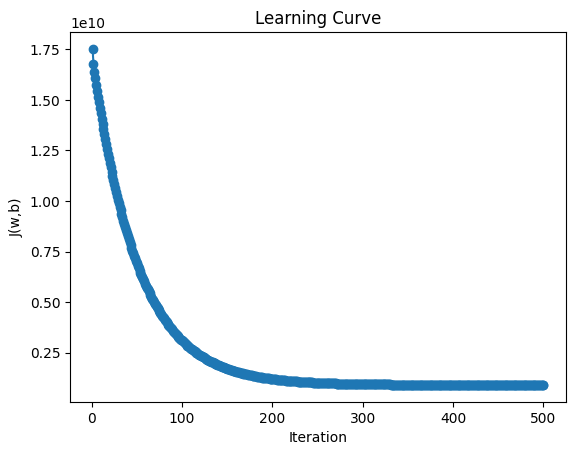

In [11]:
alpha = 0.01
epochs = 500

w,b = gradient_descent(x_train,y_train,w,b,alpha,epochs)

## Testing

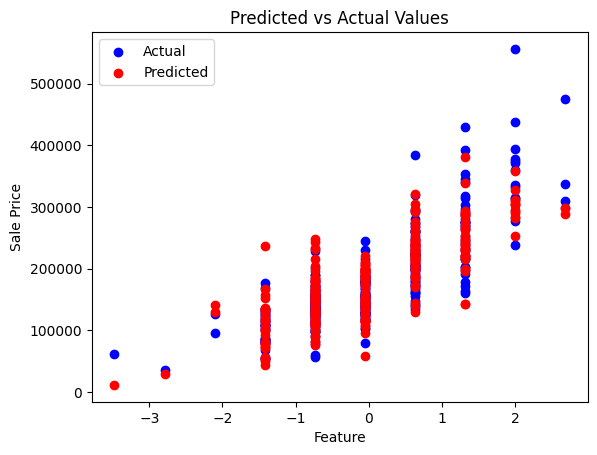

Accuracy =  0.7669503040495306


In [12]:
y_hat_test = f(x_test,w,b)
plt.scatter(x_test[:,0], y_test, label='Actual', color='blue')
plt.scatter(x_test[:,0], y_hat_test, label='Predicted', color='red')
plt.xlabel('Feature')
plt.ylabel('Sale Price')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()
r2_test = r2_score(y_test, y_hat_test)
print("Accuracy = ",r2_test)